In [ ]:
# Import necessary libraries for data collection and preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load dataset from CSV
df = pd.read_csv('predictive_maintenance.csv')

# Display first few rows of the dataset
print("Dataset Head:")
print(df.head())

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

Dataset Head:
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  

Missing Values per Column:
UDI                        0
Product ID            

In [ ]:
# Display the value counts of the target column (failure or not)
print("\nTarget (Failure) Value Counts:")
print(df['Target'].value_counts())

# One-hot encode the 'Type' column (L, M, H)
df = pd.get_dummies(df, columns=['Type'], drop_first=False)
print("\nData after One-Hot Encoding 'Type':")
print(df.head())

# Preprocessing complete: splitting features (X) and target (y)
X = df[['Air temperature [K]', 'Process temperature [K]',
        'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
        'Type_H', 'Type_L', 'Type_M']]
y = df['Target']

# Handle class imbalance using SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


Target (Failure) Value Counts:
Target
0    9661
1     339
Name: count, dtype: int64

Data after One-Hot Encoding 'Type':
   UDI Product ID  Air temperature [K]  Process temperature [K]  \
0    1     M14860                298.1                    308.6   
1    2     L47181                298.2                    308.7   
2    3     L47182                298.1                    308.5   
3    4     L47183                298.2                    308.6   
4    5     L47184                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  \
0                    1551         42.8                0       0   No Failure   
1                    1408         46.3                3       0   No Failure   
2                    1498         49.4                5       0   No Failure   
3                    1433         39.5                7       0   No Failure   
4                    1408         40.0                9       0   No Failur

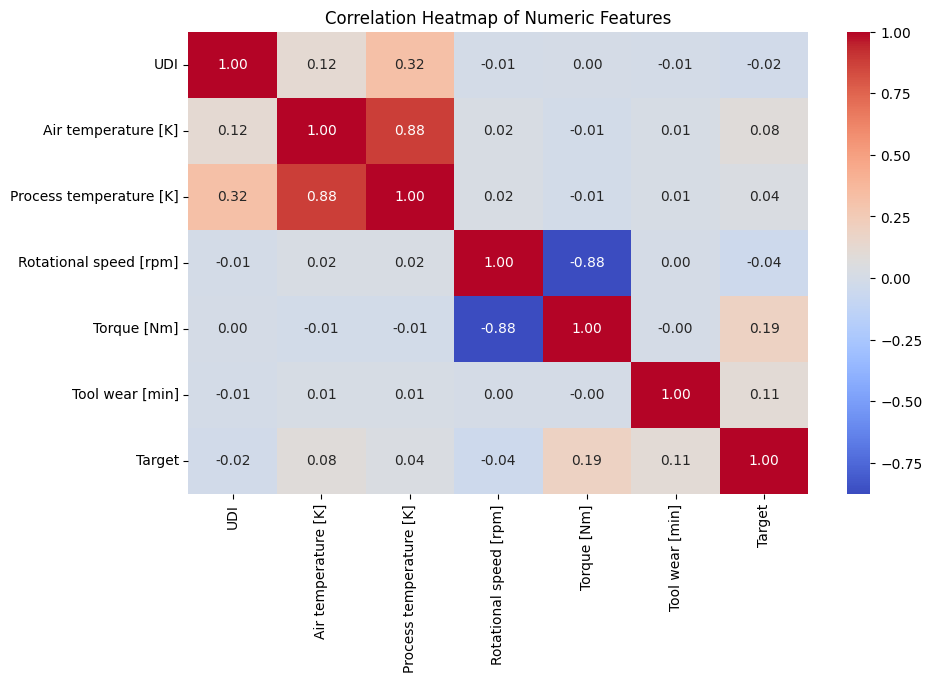

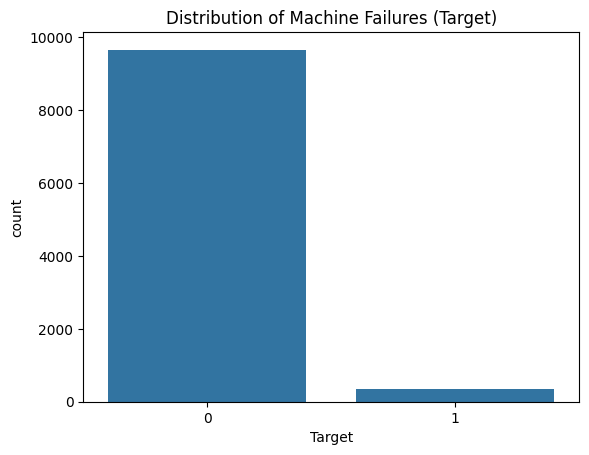

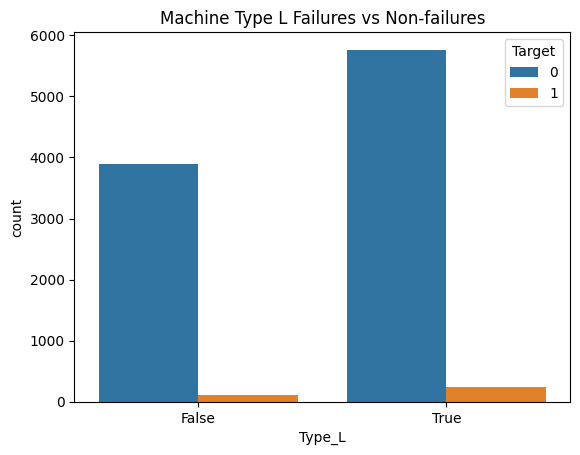

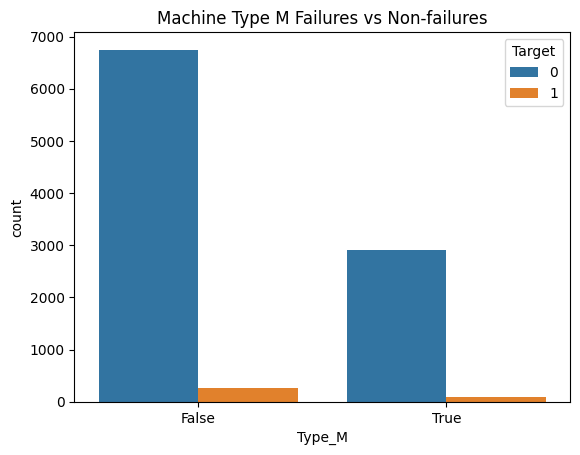

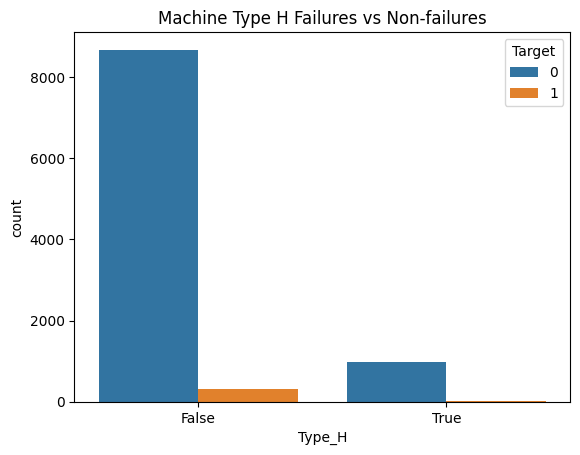


Summary Statistics:
               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.0000

In [ ]:
# Importing visualization libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Visualizing target variable distribution (failure vs non-failure)
sns.countplot(x='Target', data=df)
plt.title('Distribution of Machine Failures (Target)')
plt.show()

# Visualizing distribution of machine types and failures
sns.countplot(x='Type_L', hue='Target', data=df)
plt.title('Machine Type L Failures vs Non-failures')
plt.show()

sns.countplot(x='Type_M', hue='Target', data=df)
plt.title('Machine Type M Failures vs Non-failures')
plt.show()

sns.countplot(x='Type_H', hue='Target', data=df)
plt.title('Machine Type H Failures vs Non-failures')
plt.show()

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

In [ ]:
# Import necessary libraries for machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# List of models to try
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=300),
    'Support Vector Machine': SVC()
}

# Dictionary to store model results
results = {}

# Training and evaluating models
for name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Predict on test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = accuracy  # Store accuracy results

    # Display classification report for each model
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

# Display model performance comparison
print("\nModel Performance (Accuracy):")
for name, score in results.items():
    print(f"{name}: {score:.4f}")

# Based on the initial evaluation, RandomForestClassifier performs well.
# Hyperparameter tuning for RandomForest

best_model = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
best_model.fit(x_train, y_train)

# Final evaluation of the tuned Random Forest model
y_pred_final = best_model.predict(x_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"\nTuned Random Forest Classifier Accuracy: {final_accuracy:.4f}")
print("Final Classification Report:")
print(classification_report(y_test, y_pred_final))

# Save the final model
import pickle
with open('random_forest_final.pkl', 'wb') as f:
    pickle.dump(best_model, f)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1934
           1       0.90      0.88      0.89      1931

    accuracy                           0.89      3865
   macro avg       0.89      0.89      0.89      3865
weighted avg       0.89      0.89      0.89      3865


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1934
           1       0.96      0.98      0.97      1931

    accuracy                           0.97      3865
   macro avg       0.97      0.97      0.97      3865
weighted avg       0.97      0.97      0.97      3865


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1934
           1       0.98      0.99      0.98      1931

    accuracy                           0.98      3865
   macro